<H1 style="color:cyan; font-weight:bold;">Happy House.</H1>


In this project, a ConvNet is used to detect whether people in the image are smiling or not. The criteria for entry into the house is based on their smile status.

This is just to show an easy implementation of how the convolution and pooling layers work in CNN

## Import Packages

In [1]:
import numpy as np
from util import *
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Sequential


2024-03-25 13:12:15.183055: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-25 13:12:15.213804: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 13:12:15.704904: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load the Train and Test Dataset

The dataset will be loaded from the util file

In [2]:
X_train_original, Y_train_original, X_test_original, Y_test_original, classes = load_happy_dataset()

print("X_train_original >> ", X_train_original.shape)
print("Y_train_original >> ", Y_train_original.shape)
print("X_test_original >> ", X_test_original.shape)
print("Y_test_original >> ", Y_test_original.shape)
print("classes >> ", classes.shape)

X_train_original >>  (600, 64, 64, 3)
Y_train_original >>  (1, 600)
X_test_original >>  (150, 64, 64, 3)
Y_test_original >>  (1, 150)
classes >>  (2,)


#### Plot Images
plot random images with their response

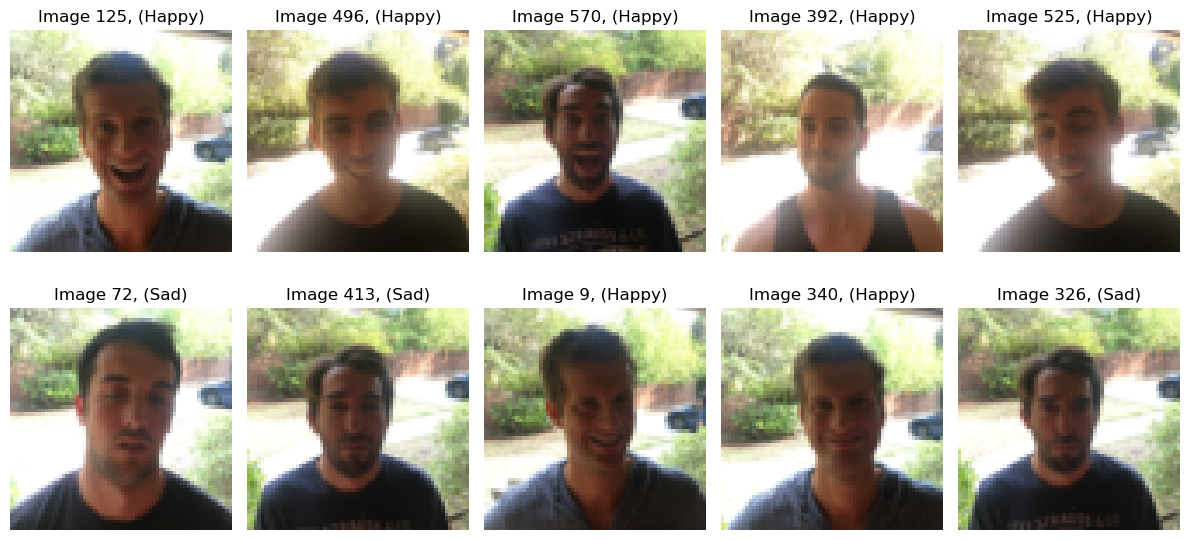

[[193 188 215 ... 219 191 173]
 [201 200 204 ... 254 224 201]
 [204 211 207 ... 242 200 184]
 ...
 [167 135 118 ...  36  36  34]
 [139 115 104 ...  35  35  37]
 [119 104  93 ...  34  33  37]]


In [3]:
# Randomly select 10 indices
num_samples = X_train_original.shape[0]
indices = np.random.choice(num_samples, size=10, replace=False)

# Plot the selected images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train_original[idx])
    plt.title(f"Image {idx}, ({'Happy' if Y_train_original[:,idx][0] else 'Sad'})")
    plt.axis('off')

plt.tight_layout()
plt.show()

print(X_train_original[1, :, :, 0])

#### Normalize Data
Divide all data by the maximum 255

In [4]:
X_train = X_train_original/255.
X_test = X_test_original/255.

print(X_train[1,:,:,0])

[[0.75686275 0.7372549  0.84313725 ... 0.85882353 0.74901961 0.67843137]
 [0.78823529 0.78431373 0.8        ... 0.99607843 0.87843137 0.78823529]
 [0.8        0.82745098 0.81176471 ... 0.94901961 0.78431373 0.72156863]
 ...
 [0.65490196 0.52941176 0.4627451  ... 0.14117647 0.14117647 0.13333333]
 [0.54509804 0.45098039 0.40784314 ... 0.1372549  0.1372549  0.14509804]
 [0.46666667 0.40784314 0.36470588 ... 0.13333333 0.12941176 0.14509804]]


#### Model

Setup the sequential model for the convnet.

Input -> ZEROPAD2D -> CONV2D -> BatchNormalization -> RELU Activation Function -> MaxPool2D -> Flatten -> Fully Connected Layers -> Output

In [19]:
def happyHouseModel():
    model = Sequential([
        # add a padding of 3 in all sides of the image
        tfl.ZeroPadding2D(padding=3, input_shape = X_train.shape[1:]),

        # 2D convolution with 32 filters of size 7 by 7 and a stride of 1
        tfl.Conv2D(32, 7, strides=1),

        #Run batch normalization
        tfl.BatchNormalization(),

        #Use Relu activation function
        tfl.ReLU(),

        #max pooling with default parameter
        tfl.MaxPooling2D(),

        #Flatten to 1D
        tfl.Flatten(),

        # connect to a dense layer with sigmoid activation function for classification.
        tfl.Dense(1, activation='sigmoid')
    ])

    return model

In [20]:
happy_house_model = happyHouseModel()

happy_house_model.summary()

/home/cifedior/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ zero_padding2d_1                │ (None, 70, 70, 3)      │             0 │
│ (ZeroPadding2D)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        32,769 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,569 (146.75 KB)

 Non-trainable params: 64 (256.00 B)

In [21]:
# Compile the model

happy_house_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
#Train the model

happy_house_model.fit(X_train, Y_train_original.T, epochs=10, batch_size=16)

Epoch 1/10


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5844 - loss: 2.5533
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8534 - loss: 0.3078
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9261 - loss: 0.1549
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9417 - loss: 0.1528
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9824 - loss: 0.0638
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9817 - loss: 0.0744
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9766 - loss: 0.0795
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9765 - loss: 0.0616
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9694 - loss: 0.0819
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9905 - loss: 0.0600


In [23]:
#evaluate the model

happy_house_model.evaluate(X_test, Y_test_original.T)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9580 - loss: 0.1509 


[0.15532639622688293, 0.9599999785423279]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


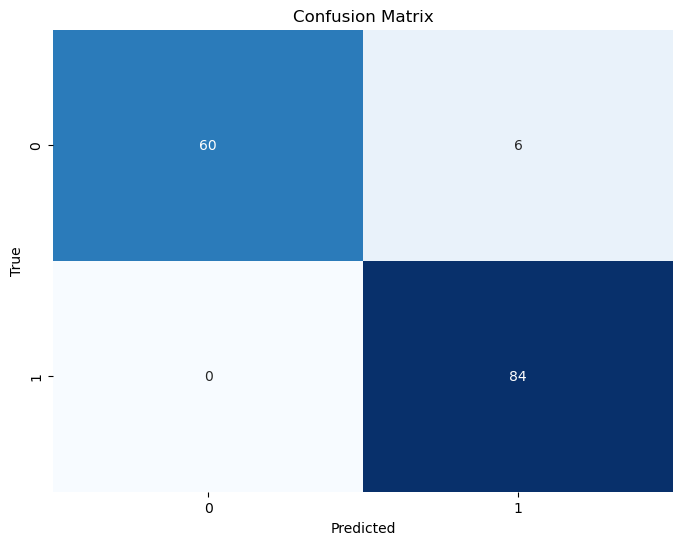

In [24]:
#Confusion metrix and accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob = happy_house_model.predict(X_test)

y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(Y_test_original.T, y_pred)

# Calculate accuracy score
acc = accuracy_score(Y_test_original.T, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Calculating the optimal threshold

Threshold is 0.7014008164405823


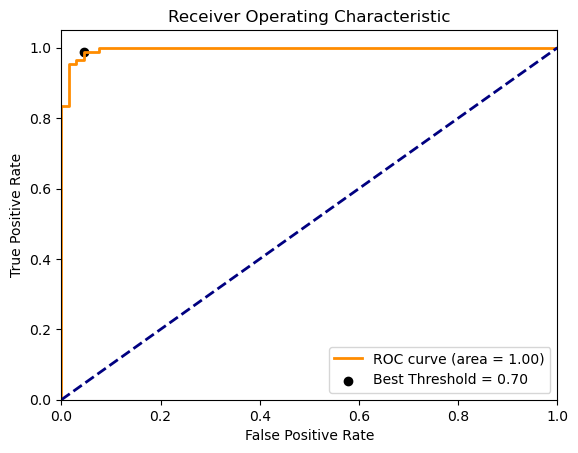

In [25]:
# Now we calculate the optimal threshold taking into account the objective.
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score


fpr, tpr, thresholds = roc_curve(Y_test_original.T, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Find the best threshold
optimal_idx = np.argmax(tpr - fpr)
THRESHOLD = thresholds[optimal_idx]

print(f"Threshold is {THRESHOLD}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Best Threshold = %0.2f' % THRESHOLD)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

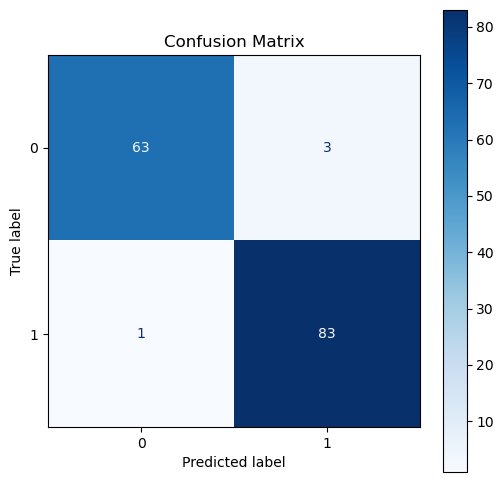

In [26]:
y_best_val_pred = (y_pred_prob >= THRESHOLD).astype(int)

# Compute confusion matrix
cm = confusion_matrix(Y_test_original.T, y_best_val_pred)

# Plotting confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Calculate TP, FP, TN, FN from confusion matrix
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]


# Calculate Precision, Recall, Specificity, F1 Score, FPR, FNR, Accuracy
precision = precision_score(Y_test_original.T, y_best_val_pred)
recall = recall_score(Y_test_original.T, y_best_val_pred)
specificity = TN / (TN + FP)
f1 = f1_score(Y_test_original.T, y_best_val_pred)
fpr = FP / (FP + TN)
fnr = FN / (FN + TP)
accuracy = accuracy_score(Y_test_original.T, y_best_val_pred)


print(f"Precision: {precision}")
print(f"Recall (Sensitivity): {recall}")
print(f"Specificity: {specificity}")
print(f"F1 Score: {f1}")
print(f"False Positive Rate (FPR): {fpr}")
print(f"False Negative Rate (FNR): {fnr}")
print(f"Accuracy: {accuracy}")

Precision: 0.9651162790697675
Recall (Sensitivity): 0.9880952380952381
Specificity: 0.9545454545454546
F1 Score: 0.9764705882352941
False Positive Rate (FPR): 0.045454545454545456
False Negative Rate (FNR): 0.011904761904761904
Accuracy: 0.9733333333333334
